In [55]:
import pandas as pd
#machine learning importation, allows for splitting the data set into traininng an dtesting sets.
from sklearn.model_selection import train_test_split
#machine learning importation, allows for standardization and normalizing methods in preprocessing, each column has a mean of 0 and a SD of 1 (scaling so that wider ranges dont dominate th elearning process)
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#SVM packages
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
#Importation to evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Gradient booster
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

#importation for SVR model

#library for KNN
from sklearn.neighbors import KNeighborsClassifier



#library for artificial neural network



In [56]:
data = pd.read_csv('parkinsons_updrs.data') 
data.tail()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
5870,42,61,0,142.79,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.84,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.82,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.73,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204
5874,42,61,0,170.73,20.513,31.513,0.00282,0.000021,0.00135,0.00166,...,0.171,0.00946,0.01154,0.01470,0.02839,0.008172,23.259,0.58608,0.57077,0.15336


In [57]:
data

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [59]:
data.isnull().sum()
#checking for null values

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

In [60]:
data.corr()
#checking for correlations between columns

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,1.000000,-0.030864,0.286851,-0.000882,0.252919,0.253643,0.135448,0.075156,0.120339,0.136474,...,0.142864,0.112950,0.138264,0.173333,0.112949,0.168743,-0.206929,0.147300,0.097464,0.157559
age,-0.030864,1.000000,-0.041602,0.019884,0.273665,0.310290,0.023071,0.035691,0.010255,0.013199,...,0.111130,0.098912,0.089983,0.135238,0.098913,0.007093,-0.104842,0.090208,-0.092870,0.120790
sex,0.286851,-0.041602,1.000000,-0.009805,-0.031205,-0.096559,0.051422,-0.154645,0.076718,0.087995,...,0.056481,0.044937,0.064819,0.023360,0.044938,0.168170,-0.000167,-0.159262,-0.165113,-0.099901
test_time,-0.000882,0.019884,-0.009805,1.000000,0.067918,0.075263,-0.022837,-0.011365,-0.028888,-0.023290,...,-0.030962,-0.029020,-0.036504,-0.039110,-0.029017,-0.026357,0.036545,-0.038887,0.019261,-0.000563
motor_UPDRS,0.252919,0.273665,-0.031205,0.067918,1.000000,0.947231,0.084816,0.050903,0.072684,0.076291,...,0.110076,0.084261,0.092105,0.136560,0.084260,0.074967,-0.157029,0.128607,-0.116242,0.162433
total_UPDRS,0.253643,0.310290,-0.096559,0.075263,0.947231,1.000000,0.074247,0.066927,0.064015,0.063352,...,0.098790,0.079363,0.083467,0.120838,0.079363,0.060952,-0.162117,0.156897,-0.113475,0.156195
Jitter(%),0.135448,0.023071,0.051422,-0.022837,0.084816,0.074247,1.000000,0.865577,0.984181,0.968214,...,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849
Jitter(Abs),0.075156,0.035691,-0.154645,-0.011365,0.050903,0.066927,0.865577,1.000000,0.844626,0.790538,...,0.655871,0.623830,0.621401,0.589998,0.623827,0.699960,-0.706418,0.547100,0.352264,0.787853
Jitter:RAP,0.120339,0.010255,0.076718,-0.028888,0.072684,0.064015,0.984181,0.844626,1.000000,0.947196,...,0.685551,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652
Jitter:PPQ5,0.136474,0.013199,0.087995,-0.023290,0.076291,0.063352,0.968214,0.790538,0.947196,1.000000,...,0.734591,0.676711,0.734021,0.668413,0.676710,0.864864,-0.662409,0.381503,0.175359,0.663491


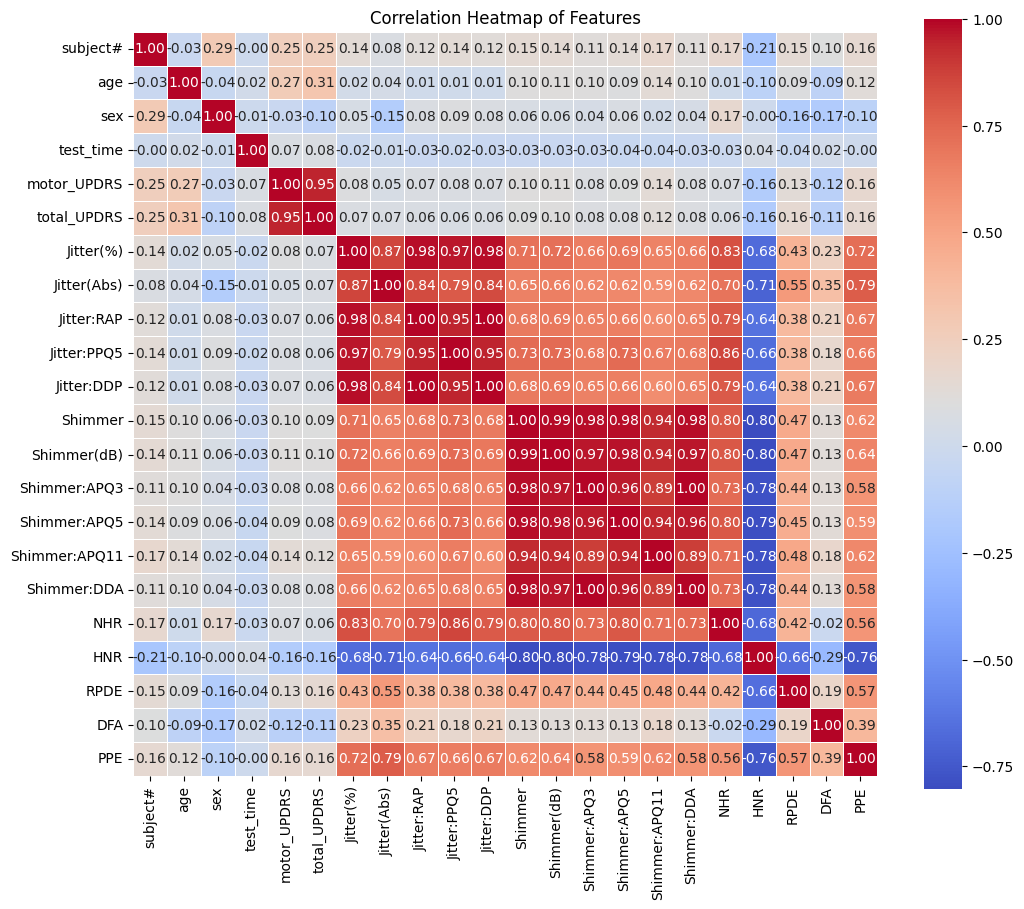

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named `data`
# Step 1: Calculate correlation matrix
correlation_matrix = data.corr()

# Step 2: Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()


Jitter and Shimmer are being kept, others are redundant, total updrs dropped too closesly correlated to motor updrs, sex has low correlation as well.

In [62]:
# Testing for motor updrs first
# Define the feature set (dropping subject ID, target, and redundant features)
X = data.drop(columns=[
    'subject#', 'motor_UPDRS', 'total_UPDRS',  # Remove ID & targets
    'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',  # Drop redundant Jitter features
    'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA' # Drop redundant Shimmer features  
])

# Define the target variable for motor_UPDRS
y_motor = data['motor_UPDRS']
y_total = data['total_UPDRS']

X


,age,sex,test_time,Jitter(%),Shimmer,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,0.00662,0.02565,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,0.00300,0.02024,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,0.00481,0.01675,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,0.00528,0.02309,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,0.00335,0.01703,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...
5870,61,0,142.7900,0.00406,0.01896,0.025137,22.369,0.64215,0.55314,0.21367
5871,61,0,149.8400,0.00297,0.02315,0.011927,22.886,0.52598,0.56518,0.12621
5872,61,0,156.8200,0.00349,0.02499,0.017701,25.065,0.47792,0.57888,0.14157
5873,61,0,163.7300,0.00281,0.01484,0.007984,24.422,0.56865,0.56327,0.14204


In [63]:
y_motor.mean()

np.float64(21.29622854468085)

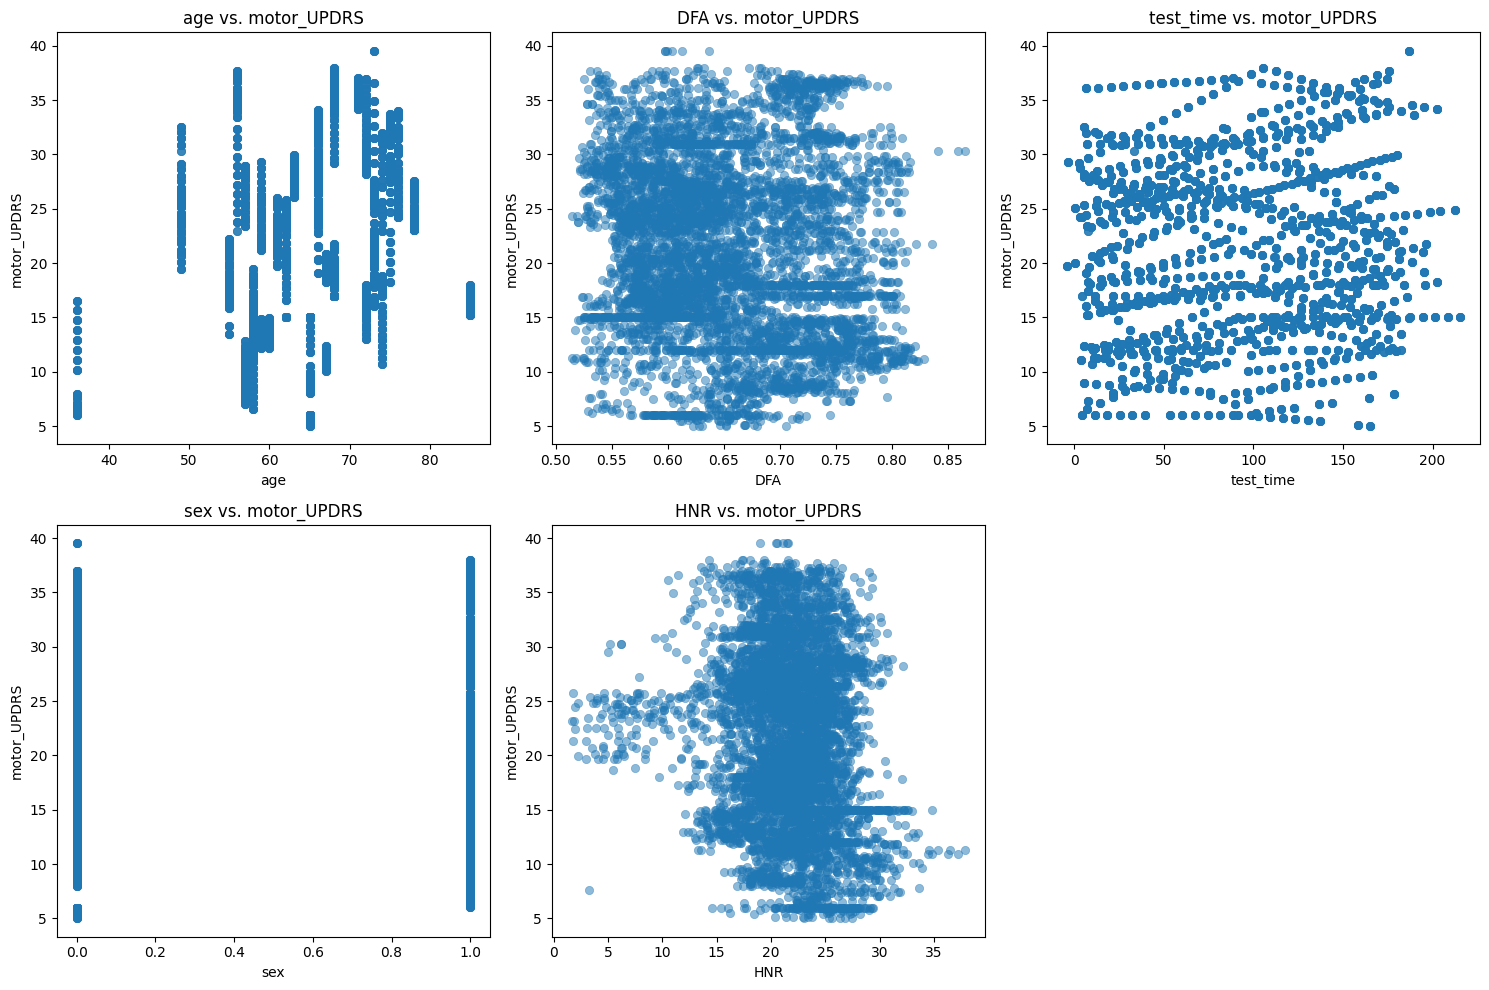

In [64]:


# Train a Random Forest model to determine feature importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_motor, test_size=0.2, random_state=42)

# Standardize the feature set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Convert to DataFrame
feature_importance_data = feature_importances.to_frame(name="Feature Importance Score").reset_index()
feature_importance_data.rename(columns={'index': 'Feature'}, inplace=True)

# Select the top 5 most important features
top_features = feature_importance_data["Feature"][:5]

# Create scatter plots for each feature vs. motor_UPDRS
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=data[feature], y=data["motor_UPDRS"], alpha=0.5, edgecolor=None)
    plt.title(f"{feature} vs. motor_UPDRS")
    plt.xlabel(feature)
    plt.ylabel("motor_UPDRS")

plt.tight_layout()
plt.show()



## Top 5 Features

1. Age vs. motor_UPDRS
Trend: A weak positive correlation is visible.
Interpretation: Older individuals tend to have slightly higher motor_UPDRS scores, but the relationship isn’t perfectly linear. There is significant spread, meaning other factors are influencing the outcome.
Conclusion: Age may be relevant, but alone, it is not a strong predictor.
2. DFA (Detrended Fluctuation Analysis) vs. motor_UPDRS
Trend: Somewhat nonlinear relationship.
Interpretation: As DFA increases, there are clusters of higher motor_UPDRS scores, but it does not follow a straight-line trend.
Conclusion: DFA seems to have an impact, but not in a simple linear way. This is why Random Forest detected it as important.
3. Test Time vs. motor_UPDRS
Trend: Weak increasing trend but high variance.
Interpretation: Over time, some patients' motor_UPDRS scores increase, but many stay stable or even decrease. This suggests disease progression is variable.
Conclusion: Time alone does not determine motor_UPDRS, but in combination with other features, it might.
4. Sex vs. motor_UPDRS
Trend: Categorical variable, so data points are split into two groups (0 = Male, 1 = Female).
Interpretation: No clear trend between sex and motor_UPDRS.
Conclusion: Sex is unlikely to be a strong predictor, but it might have an interaction effect when combined with other features.
5. HNR (Harmonics-to-Noise Ratio) vs. motor_UPDRS
Trend: Slight negative trend (as HNR decreases, motor_UPDRS increases).
Interpretation: Lower HNR values (more noise in voice signals) tend to correspond with higher motor_UPDRS scores.
Conclusion: This makes sense physiologically since Parkinson’s disease affects vocal stability. HNR may be an important predictor but needs to be considered with other voice measures.

Final Observations
No feature showed a perfectly linear trend with motor_UPDRS.
DFA and HNR had some visible patterns, but they weren’t purely linear.
Age and Test Time showed slight increasing trends, but they had too much variance to be strong individual predictors.
Sex had no clear impact.

In [65]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_motor, test_size=0.2, random_state=42)

# Standardize the feature set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

What Does random_state=42 Mean?
In the context of train-test splitting and model training, random_state is a seed value that ensures reproducibility of results.

When using:

train_test_split(X, y, test_size=0.2, random_state=42)

The dataset is split into 80% training and 20% testing.
The random_state=42 ensures that the split is the same every time you run the code.
If you change or remove random_state, the train-test split will be randomized differently each time, leading to slightly different model performance.
Why Use random_state=42?
Reproducibility: The same data points go into train/test sets every run.
Consistency: Model evaluation remains stable, avoiding performance fluctuations.
Comparability: If testing different models, they all train on the same data split.

42 is just an arbitrary choice (a reference to The Hitchhiker's Guide to the Galaxy 🤖).
Any fixed integer (e.g., random_state=1, random_state=100) ensures the same split each time.
If random_state is not set, the split is different each run.
Why Do We Need a Split?
Avoids Overfitting → If we train on all data, the model might just memorize it instead of generalizing.
Measures Model Performance → The test set evaluates how well the model performs on unseen data.

In [66]:
#Split the training data into a new training and validation set
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Train the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.3, max_depth=3, random_state=42)
gbr_model.fit(X_train_sub, y_train_sub)

# Track validation loss at each iteration
min_mse = float("inf")
best_n_estimators = 0
mse_list = []

for n, y_pred_val in enumerate(gbr_model.staged_predict(X_val)):  # Get predictions at each stage
    mse = mean_squared_error(y_val, y_pred_val)
    mse_list.append(mse)
    if mse < min_mse:
        min_mse = mse
        best_n_estimators = n  # Save the best iteration

# Retrain with the optimal number of estimators
gbr_model_best = GradientBoostingRegressor(n_estimators=best_n_estimators, learning_rate=0.15, max_depth=3, random_state=42)
gbr_model_best.fit(X_train_scaled, y_train)  # Retrain on full training data

# Make predictions
y_pred = gbr_model_best.predict(X_test_scaled)

# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred)
r2_gbr = r2_score(y_test, y_pred)

# Display results
print("Optimal n_estimators:", best_n_estimators)
print("Mean Squared Error:", mse_gbr)
print("R Squared Score:", r2_gbr)


Optimal n_estimators: 199
Mean Squared Error: 8.366361555005843
R Squared Score: 0.8689258495610095


In [67]:
#print(y_test['motor_UPDRS'].iloc[0])
#type(y_test)
print(y_test.iloc[100])

25.275


In [68]:
#print(y_pred)
print(y_pred[100])

26.23406225407665


In [69]:
#Gradient booster test
# Train the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = gbr_model.predict(X_test_scaled)

# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred)
r2_gbr = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error: ", mse_gbr, "\nR Squared Score: ", r2_gbr)

Mean Squared Error:  7.023958369172625 
R Squared Score:  0.8899570177663095


### Gradient Boosting Regressor (GBR) Hyperparameter Explanation

| Parameter         | Function                                     | Low Value Effect                           | High Value Effect                         |
|------------------|--------------------------------|--------------------------------|--------------------------------|
| `n_estimators=100` | Number of boosting iterations (trees) | Underfitting, poor accuracy | Better accuracy, but slower training |
| `learning_rate=0.1` | Each new tree corrects the mistakes made by the previous trees. The learning_rate controls how much correction is applied at each step.For example: learning_rate=0.1  Each tree contributes 10% of its prediction to the final model. learning_rate=0.01  Each tree contributes 1% of its prediction, meaning learning happens slower but more carefully. | Slow training, better generalization | Faster training, risk of overfitting |
| `max_depth=3` | A decision tree starts at the root node (the top of the tree). It splits data at each level based on feature conditions. The process continues until it reaches the max_depth limit or until further splits do not improve predictions. | Simpler model, less overfitting | More complex trees, better fit but risk of overfitting |
| `random_state=42` | a hyperparameter that ensures the reproducibility of results by controlling the random number generation used in splitting data, initializing models, and other stochastic processes. Yes, when debugging or comparing models, to ensure consistent results. No, when training final production models, to allow natural randomness for robustness. | Different results on each run | Same results on every run |


In [70]:
from sklearn.model_selection import train_test_split
X_train_motor, X_test_motor, y_train_motor, y_test_motor = train_test_split(X, y_motor, test_size=0.2, random_state=42)
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(X, y_total, test_size=0.2, random_state=42)


In [71]:
# Define SVR models with radial basis function (RBF) kernel
svm_motor = SVR(kernel='rbf')
svm_total = SVR(kernel='rbf')

# Train the SVM models
svm_motor.fit(X_train_motor, y_train_motor)
svm_total.fit(X_train_total, y_train_total)


SVR()

In [72]:
# Predict on the test set
y_pred_motor = svm_motor.predict(X_test_motor)
y_pred_total = svm_total.predict(X_test_total)

# Calculate performance metrics for motor_UPDRS prediction
mse_motor = mean_squared_error(y_test_motor, y_pred_motor)
r2_motor = r2_score(y_test_motor, y_pred_motor)
print(f'Motor UPDRS - MSE: {mse_motor}, R2: {r2_motor}')

# Calculate performance metrics for total_UPDRS prediction
mse_total = mean_squared_error(y_test_total, y_pred_total)
r2_total = r2_score(y_test_total, y_pred_total)
print(f'Total UPDRS - MSE: {mse_total}, R2: {r2_total}')


Motor UPDRS - MSE: 59.103662452261965, R2: 0.0740344780906752
Total UPDRS - MSE: 101.1953599535144, R2: 0.0867919793481019


R² Score: 0.0740


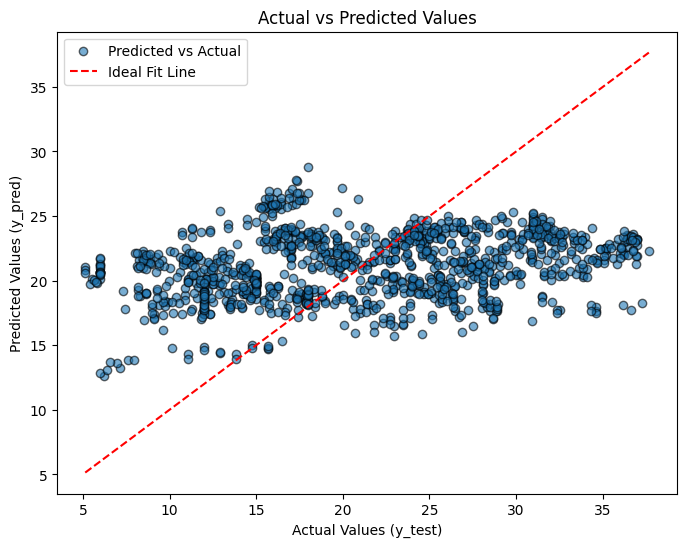

In [73]:
# Evaluate the model using R²
r2 = r2_score(y_test_motor, y_pred_motor)
print(f"R² Score: {r2:.4f}")

# Optional: Plotting Actual vs. Predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_motor, y_pred_motor, alpha=0.6, edgecolor='k', label='Predicted vs Actual')
plt.plot([y_test_motor.min(), y_test_motor.max()], [y_test_motor.min(), y_test_motor.max()], 'r--', label='Ideal Fit Line')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


In [74]:
correlation_matrix = data.corr()
print(correlation_matrix)
## get scores for this and write a statement about the correlation between the features and the target variable

               subject#       age       sex  test_time  motor_UPDRS  \
subject#       1.000000 -0.030864  0.286851  -0.000882     0.252919   
age           -0.030864  1.000000 -0.041602   0.019884     0.273665   
sex            0.286851 -0.041602  1.000000  -0.009805    -0.031205   
test_time     -0.000882  0.019884 -0.009805   1.000000     0.067918   
motor_UPDRS    0.252919  0.273665 -0.031205   0.067918     1.000000   
total_UPDRS    0.253643  0.310290 -0.096559   0.075263     0.947231   
Jitter(%)      0.135448  0.023071  0.051422  -0.022837     0.084816   
Jitter(Abs)    0.075156  0.035691 -0.154645  -0.011365     0.050903   
Jitter:RAP     0.120339  0.010255  0.076718  -0.028888     0.072684   
Jitter:PPQ5    0.136474  0.013199  0.087995  -0.023290     0.076291   
Jitter:DDP     0.120350  0.010258  0.076703  -0.028876     0.072698   
Shimmer        0.146202  0.101554  0.058736  -0.033870     0.102349   
Shimmer(dB)    0.142864  0.111130  0.056481  -0.030962     0.110076   
Shimme

## Fix the r2 squared score and make it lower, find out whats wrogn with the model, delete and restart x g boost, any further cycles will over fit the data, look up how to know i fthe model si becoming over fit, and how many cycles are best

## start working onresearch thesis 

In [75]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define scoring metric: negative MSE (sklearn requires maximized scoring)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Create cross-validation object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ----------------------------
# For motor_UPDRS
# ----------------------------
X_motor = data.drop(columns=['motor_UPDRS', 'total_UPDRS', 'subject#', 'test_time'])  # optional drop if present
y_motor = data['motor_UPDRS']


gbr_motor = GradientBoostingRegressor()

mse_scores_motor = cross_val_score(gbr_motor, X_motor, y_motor, scoring=mse_scorer, cv=kf)
r2_scores_motor = cross_val_score(gbr_motor, X_motor, y_motor, scoring='r2', cv=kf)

print("Motor UPDRS - Cross-validated MSE:", -mse_scores_motor.mean())
print("Motor UPDRS - Cross-validated R²:", r2_scores_motor.mean())

# ----------------------------
# For total_UPDRS
# ----------------------------
y_total = data['total_UPDRS']

gbr_total = GradientBoostingRegressor()

mse_scores_total = cross_val_score(gbr_total, X_motor, y_total, scoring=mse_scorer, cv=kf)
r2_scores_total = cross_val_score(gbr_total, X_motor, y_total, scoring='r2', cv=kf)

print("Total UPDRS - Cross-validated MSE:", -mse_scores_total.mean())
print("Total UPDRS - Cross-validated R²:", r2_scores_total.mean())


Motor UPDRS - Cross-validated MSE: 16.31253376235399
Motor UPDRS - Cross-validated R²: 0.7526647126625202
Total UPDRS - Cross-validated MSE: 25.081271911559362
Total UPDRS - Cross-validated R²: 0.7806440625196702


In [76]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Predictions (assuming these already exist from your models)
# y_pred_gbr = GBR predictions
# y_pred_svr = SVR predictions
# y_test = actual motor_UPDRS values

# Evaluate each model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Root Mean Squared Error (optional)
rmse_gbr = np.sqrt(mse_gbr)
rmse_svr = np.sqrt(mse_svr)

# Create comparison DataFrame
results_df = pd.DataFrame({
    "Model": ["Gradient Boosting Regressor", "Support Vector Regressor"],
    "MSE": [mse_gbr, mse_svr],
    "RMSE": [rmse_gbr, rmse_svr],
    "R² Score": [r2_gbr, r2_svr]
})

# Display results
print(results_df)


NameError: name 'y_pred_gbr' is not defined

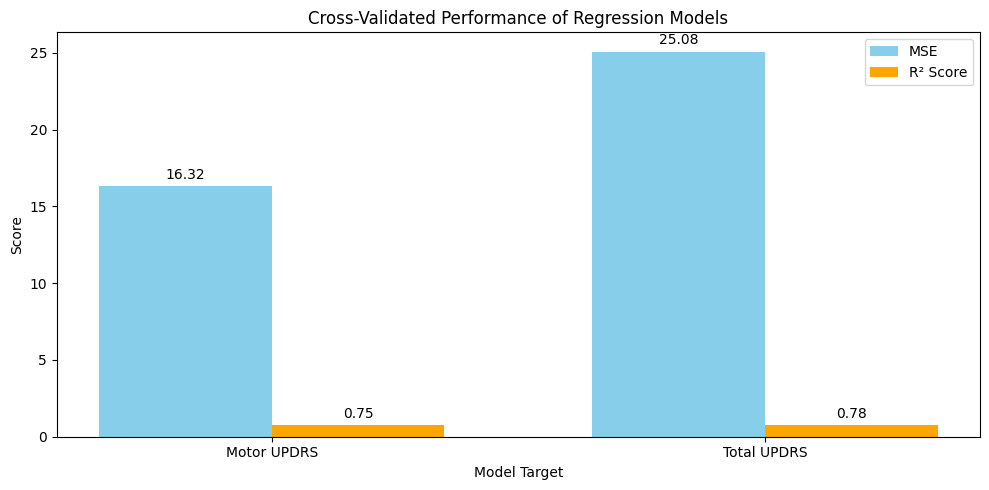

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Motor UPDRS', 'Total UPDRS']

# Corresponding MSE and R² scores from cross-validation
mse_scores = [16.32, 25.08]
r2_scores = [0.75, 0.78]

# Create bar charts
fig, ax1 = plt.subplots(figsize=(10, 5))

# Set positions and width for bars
bar_width = 0.35
x = np.arange(len(models))

# Plot MSE and R²
bar1 = ax1.bar(x - bar_width/2, mse_scores, width=bar_width, label='MSE', color='skyblue')
bar2 = ax1.bar(x + bar_width/2, r2_scores, width=bar_width, label='R² Score', color='orange')

# Labels and formatting
ax1.set_xlabel('Model Target')
ax1.set_title('Cross-Validated Performance of Regression Models')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.set_ylabel('Score')
ax1.legend()

# Add value labels on bars
for bar in bar1 + bar2:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()
